<a href="https://colab.research.google.com/github/mrefugionv/S5----MEGALINE/blob/main/P5_ANALISIS_ESTADISTICO_MEGALINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.



En este proyecto vamos a conocer si se pueden aprobar o rechazar las siguientes dos hipótesis para que la empresa Megaline pueda tomar decisiones en cuanto a sus campañas de publicidad:

* El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
* El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Para ello, se realizaran los procesos de: importación de bases de datos, revisión general de las bases de datos , preparación de los datos ( corrección de tipos de datos, revisión de valores auscentes y duplicados), obtener una nuevo dataframe con la información necesaria , plantear las hipótesis nula y alternativa y así hacer las comparaciones para probar o rechazar estas hipótesis planteadas.

El nuevo data frame debera incluir los siguientes datos por cada usuario:
* El numero de llamadas cada mes
* Los minutos utilizados en esas llamadas (los cuales se redondean en cada llamada)
* La cantidad de mensajes SMS enviados por mes
* El volumen de datos de internet utilizados por mes ( se redondea antes del cobro).
* El ingreso mensual.
* Si pertenecen al área de los estados Nueva York-Nueva Jersey o de otras regiones.


## Inicialización

In [ ]:
# Cargar todas las librerías

import pandas as pd                      # Manejo de dataframes
from matplotlib import pyplot as plt    # Crear gráficos
import seaborn as sns                   # Grafico de caja -bigotes
import numpy as np                       # Trabajar con matrices
from scipy import stats as st            # Calculos estadísticos
import math as mt                        # funciones matematicas (ej. sqrt)


## Cargar datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('datasets/megaline_calls.csv')
internet = pd.read_csv('datasets/megaline_internet.csv')
messages  = pd.read_csv('datasets/megaline_messages.csv')
plans  = pd.read_csv('datasets/megaline_plans.csv')
users  = pd.read_csv('datasets/megaline_users.csv')

## Preparar los datos

Los datos para este proyecto se dividen en varias tablas. Explorar cada una para tener una comprensión inicial de los datos y realizar correcciones si son requeridas en cada tabla, es una buena práctica.

### Tarifas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [ ]:
# Imprime una muestra de los datos para las tarifas
plans.head(2)    # Solo tenemos dos entradas, imprimimos ambas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En la información general se muestra que tenemos unicamente dos entradas en esta tabla, que corresponde a los dos planes (cuyos valores en objetos string son: surf y ultimate), de cada uno se especifican:
* Expresados en número enteros:  el numero de mensajes incluidos, los megabytes incluidos por mes, los minutos incluidos, el costo por mes en dolares estadounidenses y el costo de gygabyte extra en dolares.
* Expresados en números flotantes: el costo por mensaje extra en dolares y el costo por minuto extra en dolares.
No hay valores ausentes y los tipos de datos concuerdan con la información que representa.

En la muestra de datos pordemos observar cada uno de los valores correspondientes, se muestra la tabla completa.

#### Corregir datos

No es necesaria la correción de los datos. De acuerdo a la información dada la cual se muestra a continuación, no hay errores en los valores y los tipos de datos van acorde al valor que expresan.

Surf
Pago mensual: 20 dolares
Minutos al mes : 500
SMS al mes : 50 SMS
Flujo de datos: 15 GB .
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: 10 dolares.

Ultimate
Pago mensual: 70 dolares.
Minutos al mes : 3000.
SMS al mes : 1000 .
Flujo de datos : 30 GB
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: 7 dolares.

La unica diferencia radica en que en la tabla el flujo de datos esta expresado en megabytes en lugar de gygabytes:
* Surf : 15360 MG = 15 GB
* Ultimate :  30720 MG = 30 GB


#### Enriquecer los datos

No parece ser necesario enriquecer datos:
* Los titulos de las columnas estan en formato snakecase y expresan de manera entendible que representa cada dato
* No tenemos valores ausentes, ni duplicados.

La unica observación a tomar en cuenta para hacer los cobros es que esta tabla refleja el flujo de datos incluidos en la tarifa en unidades de MB, y no en GB redondeados. Sin embargo no es necesario realizar esa conversión en esta tabla ya que esta tabla oficial de las tarifas y en el titulo de la columna se expresa explicitamente que el valor esta dado en MB.

### Usuarios/as

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de datos para usuarios

users.sample(20) # Muestra aleatoria = representativa

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
206,1206,Angelic,Singleton,21,"Providence-Warwick, RI-MA MSA",2018-07-09,surf,NaN
44,1044,Devora,Galloway,74,"Albuquerque, NM MSA",2018-08-30,surf,NaN
470,1470,Gerald,Reese,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-04-21,surf,NaN
405,1405,Shella,Hunter,34,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-22,ultimate,NaN
106,1106,Eddy,Garrison,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-10,surf,2018-11-14
261,1261,Dusti,Forbes,31,"Kansas City, MO-KS MSA",2018-02-22,surf,NaN
228,1228,Jude,Hale,26,"Detroit-Warren-Dearborn, MI MSA",2018-04-15,surf,NaN
427,1427,Zofia,Brock,64,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-01-26,ultimate,NaN
149,1149,Jamaal,Camacho,54,"San Francisco-Oakland-Berkeley, CA MSA",2018-03-03,surf,NaN
432,1432,Azucena,Goodwin,59,"Salt Lake City, UT MSA",2018-10-03,ultimate,NaN


En la tabla de información podemos notar dos cosas:
* El número de identificador de usuario esta dado por un número entero, se recomienda que los identificadores sean tipo string ya que no se realizan operaciones matemáticos con ellos, sino de comparación.
* La mayor parte de los datos en la columna "churn_date" son nulos (solo 34 de 500 tienen valor), aquí hay que considerar una observación que nos hicieron al entregar las bases de datos: Esta columna se refiere a la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).

#### Corregir los datos

Se tranformara el tipo de dato de "user_id", de entero a string.

In [ ]:
users['user_id']= users['user_id'].astype('str')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


#### Enriquecer los datos

Podemos agregar una columna binomial que nos indique si el usuario pertenece al área de los estados de New York- Jersey o no, para después facilitar la prueba de la segunda hipótesis:
* El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones

In [ ]:
NY_NJ = []

for user in users['city']:
    if user == 'New York-Newark-Jersey City, NY-NJ-PA MSA':
        NY_NJ.append(True)
    else:
        NY_NJ.append(False)

users['NY-NJ'] = NY_NJ

print(users.sample(20))

    user_id first_name   last_name  age  \
446    1446   Pasquale        Ball   52   
63     1063   Larhonda     Hartman   60   
335    1335       Gail     Coleman   61   
378    1378   Mckinley     Clayton   22   
469    1469       Rory       Nixon   75   
427    1427      Zofia       Brock   64   
61     1061     Maryam    Valencia   38   
130    1130   Clarence  Cunningham   27   
96     1096       Song       Cline   28   
287    1287      Heide        Gill   74   
23     1023       Jack     Delaney   70   
276    1276     Karmen      Carney   20   
250    1250      Milan     Sellers   57   
240    1240      Drema       Lopez   61   
79     1079      Brian      Mccall   48   
75     1075     Salena       Bates   35   
88     1088      Paris   Robertson   64   
35     1035       Jeff    Cummings   67   
390    1390    Deloras  Strickland   61   
180    1180      Wonda        Hays   24   

                                                 city    reg_date      plan  \
446              

### Llamadas

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
# Imprime una muestra de datos para las llamadas
calls.head(5)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


En la información general de esta tabla podemos observar que:
* No hay datos auscentes
* El tipo de dato del 'user_id' es entero, usualmente los identificadores se manejan como strings por que no se realizan operaciones matemáticas con ellos.
* El tipo de dato de la duración de llamada es flotante, de acuerdo a las indicaciones podemos convertirla entero redondeando hacia arriba. Se indico que : " Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto."
* El tipo de dato de la fecha se encuentra en objecto, habrá que asegurarnos de convertirlo a 'datetime'. Esta dado como yyyy-mm-dd.



#### Corregir los datos

Se transforma 'user_id'a tipo string, 'duration' a entero, y 'call_date' a datetime64.

In [ ]:
calls['user_id']= calls['user_id'].astype('str')
calls['call_date']= pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')

rounded_duration = []
for minutes in calls['duration']:
    rounded = mt.ceil(minutes)
    rounded_duration. append(rounded)

calls['rounded_duration'] = rounded_duration
print(calls.head(5))                             #Verificar que se hicieron los redondesos hacia arriba desde 0.01

calls.drop(columns = 'duration', inplace=True)   #Eliminamos la duraci+on en flotantes, ya no nos sera util
calls. info()
print()
print(calls.head(5))

         id user_id  call_date  duration  rounded_duration
0   1000_93    1000 2018-12-27      8.52                 9
1  1000_145    1000 2018-12-27     13.66                14
2  1000_247    1000 2018-12-27     14.48                15
3  1000_309    1000 2018-12-28      5.76                 6
4  1000_380    1000 2018-12-30      4.22                 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  object        
 2   call_date         137735 non-null  datetime64[ns]
 3   rounded_duration  137735 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.2+ MB

         id user_id  call_date  rounded_duration
0   1000_93    1000 2018-12-27                 9
1  1000_145    1000 2018-12-27        

#### Enriquecer los datos


Más adelante necesitaremos obtener los ingresos que hicieron los usuarios por mes para obtener las distribuciones de estos datos. Para ello será comveniente tener una columna que indique unicamente el mes de cada llamada, que llamaremos "call_month, en lugar de toda la fecha. Esto facilitara el manejo de los datos para realizar los calculos de los cobros.

In [ ]:
calls['call_month'] = calls['call_date'].dt.month
print(calls.sample(5))

              id user_id  call_date  rounded_duration  call_month
106640  1377_192    1377 2018-08-08                10           8
73885   1261_671    1261 2018-07-26                 1           7
104683  1368_398    1368 2018-12-26                 6          12
70605   1251_616    1251 2018-12-24                 9          12
44776   1161_448    1161 2018-12-19                 7          12


### Mensajes

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Imprime una muestra de datos para los mensajes

messages.sample(5)

,id,user_id,message_date
34483,1219_25,1219,2018-11-22
45284,1304_269,1304,2018-11-13
66159,1433_99,1433,2018-11-14
9331,1069_194,1069,2018-11-16
21346,1132_648,1132,2018-11-11


Observamos que:
* No hay datos faltantes.
* El 'user_id' esta dado como entero, una vez más podemos es combeniente tranformarlo a string.
* Hay que asegurarnos de que la fecha este en formato 'datetime' (yyyy-mm-dd) para poder utilizar esa información.

#### Corregir los datos

Tranformamos 'user_id' a string y 'message_date' a 'datetime'.

In [ ]:
messages['user_id']= messages['user_id'].astype('str')
messages['message_date']= pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')

messages.info()
print()
print(messages.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB

             id user_id message_date
67375  1435_413    1435   2018-12-11
3786   1038_139    1038   2018-11-27
74931    1489_6    1489   2018-10-19
31601   1196_84    1196   2018-03-20
25579  1154_162    1154   2018-10-09


#### Enriquecer los datos

Los mensages enviados por usuario en cada mes tambien son parte del calculo de ingresos por usuario mensualmente, información necesaria para la prueba de las hipótesis. Por lo que en este caso también facilitara los calculos el tener una columna con solo el valor del mes en que se envio el mensaje: "message_month".

In [ ]:
messages['message_month'] = messages['message_date'].dt.month
print(messages.sample(5))

              id user_id message_date  message_month
21658  1132_1101    1132   2018-11-03             11
54796   1346_304    1346   2018-10-31             10
66747   1434_283    1434   2018-11-24             11
7340    1059_216    1059   2018-06-04              6
36388    1242_60    1242   2018-12-13             12


### Internet

In [ ]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(5)


,id,user_id,session_date,mb_used
96007,1448_153,1448,2018-10-24,0.00
43842,1194_260,1194,2018-11-19,720.44
47371,1211_248,1211,2018-12-07,1010.57
11455,1056_122,1056,2018-12-20,638.83
34886,1156_483,1156,2018-09-15,313.70


Con ayuda de la información general y la impresión de una muestra aleatoria de dataframe 'internet', podemos observar:
* No hay datos auscentes.
* El identificador de usuario esta dado como tipo de dato entero. Como no se ocupa para hacer calculos matemáticos, lo podemos convertir a string.
* La fecha de sesión esta en dato tipo objeto, para hacer uso de esa información podemos cambiar estos valores a tipo de dato 'datetime' con formato yyyy-mm-dd.
* Los MB utilizados esta en tipo de dato flotante. A diferencia del tiempo de las llamadas, la empresa redondea el valor de la cantidad de flujo de datos hasta el final del mes, es decir redodea la suma de todas las sesiones por lo que en este momento estos valores estan correctos como estan. La indicación recibida al respecto es:ara el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

#### Corregir los datos

Convertimos 'user_id' a tipo str y 'session_date' a tipo 'datetime64'

In [ ]:
internet['user_id']= internet['user_id'].astype('str')
internet['session_date']= pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')

internet.info()
print()
print(internet.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB

             id user_id session_date  mb_used
2371   1011_111    1011   2018-07-23   238.79
14864  1067_228    1067   2018-11-08   197.21
74021  1347_116    1347   2018-07-31     0.00
30523   1140_66    1140   2018-08-16   455.53
36136  1163_117    1163   2018-09-06   253.38


#### Enriquecer los datos

Al igual que en las llamadas y los mensages, necesitamos para el flujo de internet los datos por mes por los que el crear una columna unicamente con el valor del mes de la sesion nos facilitara los siguientes pasos.

In [ ]:
internet['session_month'] = internet['session_date'].dt.month
print(internet.sample(5))

             id user_id session_date  mb_used  session_month
12277  1059_390    1059   2018-09-23   460.47              9
16135    1073_9    1073   2018-11-25     0.00             11
6022    1033_83    1033   2018-10-09     0.00             10
96694  1454_150    1454   2018-07-26   620.90              7
37034  1166_200    1166   2018-11-02   295.87             11


El dato de los MB usados aun no son redondeados, ni convertidos a GB. Ese paso se hará hasta que se obtenga la suma total de los datos utilizados por cada usuario , de acuerdo a la manera en que la empresa calcula el total a pagar por usuario al mes.

## Estudiar las condiciones de las tarifas

Imprimimos nuevamente la información de las tarifas para recordar las condiciones con las que se cobran a los usuarios en función a su plan de suscripción.

In [ ]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans.head(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Ahora obtendremos una nueva base de datos en las que se colocaran los datos por usuario y por periodo, para que solo haya un registro por usuario y por periodo.

In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

pivot_calls = calls.pivot_table (  #Utilizamos tablas dinámicas para agrupar
index = 'user_id',                 #User id sera el indice que correpoonde a los valores de las filas
columns = 'call_month',            # Queremos una columna por cada mes del año
values = 'id',                     # En cada celda queremos que se coloque el número de llamada que hizo ...
aggfunc = 'count'                  #... el usuario ese mes por eso contamos el numero de id de llamadas
)

#pivot_calls.info()
#print()
#print(pivot_calls.head())
#print ()


# Observamos que tenemos varios valores nulos, la razón: ese mes ese usuario no realizo llamadas por lo que
#podemos indicar que esos valores nulos (NaN) corresponden a 0 .
columns_to_replace = [1,2,3,4,5,6,7,8,9,10,11,12]
for column in columns_to_replace:
    pivot_calls[column].fillna(0)
    pivot_calls[column]=pivot_calls[column].astype('int')  #Se tratan de valores enteros,
#podemos convertirlos a este tipo en lugar de flotantes con fines de ahorro de memoria.

# Renombramos columnas, para poder distinguir entre llamadas, minutos, mensajes, internet cuando combinemos ...
#.. en una sola tabla todos los datos.
new_columns = {1:'calls_m1',2:'calls_m2',3:'calls_m3',4:'calls_m4',5:'calls_m5',6:'calls_m6',
               7:'calls_m7',8:'calls_m8',9:'calls_m9',10:'calls_m10',11:'calls_m11',12: 'calls_m12'}
pivot_calls.rename(columns = new_columns)

#pivot_calls.info()
#print()
#print(pivot_calls.head())


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

pivot_min = calls.pivot_table(  #Utilizamos tablas dinámicas para agrupar
index = 'user_id',                 #User id sera el indice que correpoonde a los valores de las filas
columns = 'call_month',            # Queremos una columna por cada mes del año
values = 'rounded_duration',              # En cada celda queremos que se coloque la duracion total de llamadas ...
aggfunc = 'sum'                  #... del usuario en ese mes por eso sumamos la duracion de cada llamada de ese usuario
)

#pivot_min.info()
#print()
#print(pivot_min.head())
#print ()


# Observamos que tenemos varios valores nulos, la razón: ese mes ese usuario no realizo llamadas por lo que
#podemos indicar que esos valores nulos (NaN) corresponden a 0 .
columns_to_replace = [1,2,3,4,5,6,7,8,9,10,11,12]
for column in columns_to_replace:
    pivot_min[column].fillna(0)
    pivot_min[column]=pivot_min[column].astype('int')  #Se tratan de valores enteros
    #(recordando que ya estan redondeados),podemos convertirlos a tipo enteros en lugar de flotantes.

# Renombramos columnas, para poder distinguir entre llamadas, minutos, mensajes, internet cuando combinemos ...
#.. en una sola tabla todos los datos.
new_columns = {1:'min_m1',2:'min_m2',3:'min_m3',4:'min_m4',5:'min_m5',6:'min_m6',
               7:'min_m7',8:'min_m8',9:'min_m9',10:'min_m10',11:'min_m11',12: 'min_m12'}
pivot_min.rename(columns = new_columns)

#pivot_min.info()
#print()
#print(pivot_min.head())


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

pivot_sms = messages.pivot_table(  #Utilizamos tablas dinámicas para agrupar
index = 'user_id',                 #User id sera el indice que correpoonde a los valores de las filas
columns = 'message_month',            # Queremos una columna por cada mes del año
values = 'id',           # En cada celda queremos que se coloque el numero de mensajes enviados ...
aggfunc = 'count'                  #... por el usuario en ese mes por eso contamos los id de sms de ese usuario
)

#pivot_sms.info()
#print()
#print(pivot_sms.head())
#print ()


# Observamos que tenemos varios valores nulos, la razón: ese mes ese usuario no realizo llamadas por lo que
#podemos indicar que esos valores nulos (NaN) corresponden a 0 .
columns_to_replace = [1,2,3,4,5,6,7,8,9,10,11,12]
for column in columns_to_replace:
    pivot_sms[column].fillna(0)
    pivot_sms[column]=pivot_sms[column].astype('int')  #Se tratan de valores enteros
    #(ya que es resultado de conteo),podemos convertirlos a tipo enteros en lugar de flotantes.

# Renombramos columnas, para poder distinguir entre llamadas, minutos, mensajes, internet cuando combinemos ...
#.. en una sola tabla todos los datos.
new_columns = {1:'sms_m1',2:'sms_m2',3:'sms_m3',4:'sms_m4',5:'sms_m5',6:'sms_m6',
               7:'sms_m7',8:'sms_m8',9:'sms_m9',10:'sms_m10',11:'sms_m11',12: 'sms_m12'}
pivot_sms.rename(columns = new_columns)

#pivot_sms.info()
#print()
#print(pivot_sms.head())


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#Se obtendran el valor redondeado de GB hacia arriba, una vez sumado el flujo de datos usado por ...
#... cada usuario al mes, siguiendo el metodo de cobro de la empresa.

pivot_gb = internet.pivot_table(  #Utilizamos tablas dinámicas para agrupar
index = 'user_id',                 #User id sera el indice que correpoonde a los valores de las filas
columns = 'session_month',            # Queremos una columna por cada mes del año
values = 'mb_used',              # En cada celda queremos que se coloque el flujo total de datos usados ...
aggfunc = 'sum'                  #...por el usuario en ese mes por eso sumamos la mb de cada sesion de ese usuario
)

#pivot_gb.info()
#print()
print(pivot_gb.head())
#print ()


# Observamos que tenemos varios valores nulos, la razón: ese mes ese usuario no realizo llamadas por lo que
#podemos indicar que esos valores nulos (NaN) corresponden a 0 .
columns_to_replace = [1,2,3,4,5,6,7,8,9,10,11,12]
for column in columns_to_replace:
    pivot_gb[column].fillna(0)
    pivot_gb[column]=pivot_gb[column]/1000
       # Como ya tenemos las sumas totales del mes por usuario, y siguiendo el método de cobro de la empresa,
        #ya podemos en convertir a GB y redondear hacia arriba
    rounded_gb = []
    for gb in  pivot_gb[column]: #Recorre cada columna
        rounded = mt.ceil(gb)      #redondea hacia arriba cada valor
        rounded_gb.append(rounded)  #generamos lista
    pivot_gb[column] = rounded_gb     #Asignamos la lista como la nueva columna del DF



# Renombramos columnas, para poder distinguir entre llamadas, minutos, mensajes, internet cuando combinemos ...
#.. en una sola tabla todos los datos.
new_columns = {1:'gb_m1',2:'gb_m2',3:'gb_m3',4:'gb_m4',5:'gb_m5',6:'gb_m6',
               7:'gb_m7',8:'gb_m8',9:'gb_m9',10:'gb_m10',11:'gb_m11',12: 'gb_m12'}
pivot_gb.rename(columns = new_columns)

#print()
#pivot_gb.info()
#print()
#print(pivot_gb.head())


Se juntan los datos agregados en un solo DataFrame para que haya un único registro que represente lo que consumió un usuario en un mes determinado.

In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merged_DF = pivot_calls.merge(pivot_min, on = 'user_id', how = 'outer') #Se fusiona con outer para asegurarnos de no perder información
merged_DF = merged_DF.merge(pivot_sms, on = 'user_id', how = 'outer')
merged_DF = merged_DF.merge(pivot_gb, on = 'user_id', how = 'outer')

#Como son de diferentes tamaños los DF habra valores nulos, los podemos convertir a ceros.
# Como todas las tablas anteriores representan numeros enteros, esta tambien podemos qasegurarnos que sean este tipo de dato.
columns_to_replace = ['calls_m1','calls_m2','calls_m3','calls_m4','calls_m5','calls_m6','calls_m7',
                      'calls_m8','calls_m9','calls_m10','calls_m11', 'calls_m12',
                      'min_m1','min_m2','min_m3','min_m4','min_m5','min_m6','min_m7',
                      'min_m8','min_m9','min_m10','min_m11', 'min_m12',
                      'sms_m1','sms_m2','sms_m3','sms_m4','sms_m5','sms_m6','sms_m7',
                      'sms_m8','sms_m9','sms_m10','sms_m11', 'sms_m12',
                      'gb_m1','gb_m2','gb_m3','gb_m4','gb_m5','gb_m6','gb_m7',
                      'gb_m8','gb_m9','gb_m10','gb_m11', 'gb_m12']

for column in columns_to_replace:
        merged_DF[column].fillna(0,inplace=True)
        merged_DF[column]=merged_DF[column].astype('int')

merged_DF.info()
print()
print(merged_DF.sample(5))


<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 1000 to 1499
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   calls_m1   490 non-null    int64
 1   calls_m2   490 non-null    int64
 2   calls_m3   490 non-null    int64
 3   calls_m4   490 non-null    int64
 4   calls_m5   490 non-null    int64
 5   calls_m6   490 non-null    int64
 6   calls_m7   490 non-null    int64
 7   calls_m8   490 non-null    int64
 8   calls_m9   490 non-null    int64
 9   calls_m10  490 non-null    int64
 10  calls_m11  490 non-null    int64
 11  calls_m12  490 non-null    int64
 12  min_m1     490 non-null    int64
 13  min_m2     490 non-null    int64
 14  min_m3     490 non-null    int64
 15  min_m4     490 non-null    int64
 16  min_m5     490 non-null    int64
 17  min_m6     490 non-null    int64
 18  min_m7     490 non-null    int64
 19  min_m8     490 non-null    int64
 20  min_m9     490 non-null    int64
 21  min_m10    490 no

C:\Users\cucum\AppData\Local\Temp\ipykernel_16084\1839788104.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_DF[column].fillna(0,inplace=True)
C:\Users\cucum\AppData\Local\Temp\ipykernel_16084\1839788104.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [ ]:
# Añade la información de la tarifa
merged_DF = merged_DF.merge(users, on = 'user_id', how = 'left')

#Eliminamos las columnas de users, que no nos son utiles:
merged_DF = merged_DF.drop('first_name', axis = 'columns')
merged_DF =merged_DF.drop('last_name', axis = 'columns')
merged_DF =merged_DF.drop('age', axis = 'columns')
merged_DF =merged_DF.drop('city', axis = 'columns')
merged_DF =merged_DF.drop('reg_date', axis = 'columns')
merged_DF =merged_DF.drop('churn_date', axis = 'columns')
#solo conservamos las columnas 'plan' y la creada 'NY-NJ' ( nos indica si son de la region New Yor - New Jersey)



merged_DF.info()
print()
print(merged_DF.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    490 non-null    object
 1   calls_m1   490 non-null    int64 
 2   calls_m2   490 non-null    int64 
 3   calls_m3   490 non-null    int64 
 4   calls_m4   490 non-null    int64 
 5   calls_m5   490 non-null    int64 
 6   calls_m6   490 non-null    int64 
 7   calls_m7   490 non-null    int64 
 8   calls_m8   490 non-null    int64 
 9   calls_m9   490 non-null    int64 
 10  calls_m10  490 non-null    int64 
 11  calls_m11  490 non-null    int64 
 12  calls_m12  490 non-null    int64 
 13  min_m1     490 non-null    int64 
 14  min_m2     490 non-null    int64 
 15  min_m3     490 non-null    int64 
 16  min_m4     490 non-null    int64 
 17  min_m5     490 non-null    int64 
 18  min_m6     490 non-null    int64 
 19  min_m7     490 non-null    int64 
 20  min_m8     490 non-null    int64

Ahora se calcula los ingresos mensuales por usuario dadas las condiciones del plan (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas).

In [ ]:
# Calcula el ingreso mensual para cada usuario

for month in [1,2,3,4,5,6,7,8,9,10,11,12]:
    payment = []
    for user in range(0, len(merged_DF)):
        minutes = 0   #numero de minutos extra
        minutes_p =0   #pago por minutos extra
        sms = 0       #numero de mensajes extra
        sms_p = 0    #pago por mensajes extra
        gb = 0        # gb extras usados
        gb_p = 0      #pago por gb extras usados
        total = 0

        if merged_DF.loc[user,'plan'] == 'surf':
            plan = 20
            minutes= (merged_DF.loc[user,f'min_m{month}'] - 500)
            if minutes > 0:
                minutes_p = minutes * 0.3
            else:
                minutes_p = 0     # sino exceden los minutos dados no pagan extra
            sms= (merged_DF.loc[user,f'sms_m{month}'] - 50)
            if sms > 0:
                sms_p = sms * 0.3
            else:
                sms_p = 0   # sino excenden los mensajes dados no pagan extra
            gb =(merged_DF.loc[user,f'gb_m{month}'] - 15)
            if gb > 0:
                gb_p = gb * 10
            else:
                gb_p = 0    # sino exceden los 15 gb, no pagan extra
            total = plan + minutes_p +sms_p + gb_p
            payment.append(total)

        else:
            plan = 70
            minutes =(merged_DF.loc[user,f'min_m{month}'] - 3000)
            if minutes > 0:
                minutes_p = mintes * 0.1
            else:
                minutes_p = 0 # Sino excenden los minutos dados no pagan extra
            sms =(merged_DF.loc[user,f'sms_m{month}'] - 1000)
            if sms > 0:
                sms_p = sms * 0.1
            else:
                sms_p = 0 # Sino exceden los mensajes dados no pagan extra
            gb = (merged_DF.loc[user,f'gb_m{month}'] - 30)
            if gb > 0 :
                gb_p = gb * 7
            else:
                gb_p = 0 # Sino excenden los GB dados no pagan extra.
            total = plan + minutes_p +sms_p + gb_p
            payment.append(total)

    merged_DF[f'payment_m{month}'] = payment


merged_DF.info()  # ya tenemos los pagos de cada mes, en flotante (dolares y centavos)
print()
print(merged_DF.sample(5))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 63 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      490 non-null    object 
 1   calls_m1     490 non-null    int64  
 2   calls_m2     490 non-null    int64  
 3   calls_m3     490 non-null    int64  
 4   calls_m4     490 non-null    int64  
 5   calls_m5     490 non-null    int64  
 6   calls_m6     490 non-null    int64  
 7   calls_m7     490 non-null    int64  
 8   calls_m8     490 non-null    int64  
 9   calls_m9     490 non-null    int64  
 10  calls_m10    490 non-null    int64  
 11  calls_m11    490 non-null    int64  
 12  calls_m12    490 non-null    int64  
 13  min_m1       490 non-null    int64  
 14  min_m2       490 non-null    int64  
 15  min_m3       490 non-null    int64  
 16  min_m4       490 non-null    int64  
 17  min_m5       490 non-null    int64  
 18  min_m6       490 non-null    int64  
 19  min_m7  

## Estudia el comportamiento de usuario

Se calculan algunas estadísticas descriptivas para los datos que nos sean útiles de la tabla craeda 'merged_DF', así podremos obtener una visión general de los datos. Con ayuda de gráficos se facilita la comprensión.

Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas se calcularán por tarifa.

### Llamadas

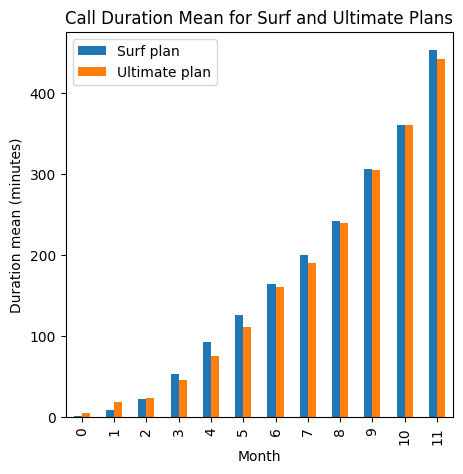

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Primero separamos los datos por cada tarifa
df_surf = merged_DF[merged_DF['plan']=='surf']
df_ultimate = merged_DF[merged_DF['plan']=='ultimate']
#df_surf.info()   # 333 entradas
#df_ultimate.info()  # 157 entradas    << total las 490 entradas de merged_DF (no todos los 500 usurios usaron los servicios en el 2018)

#Obtenemos las tablas de duración  de llamadas
df_surf_calls = df_surf.loc[:,['min_m1','min_m2','min_m3','min_m4','min_m5','min_m6','min_m7',
                      'min_m8','min_m9','min_m10','min_m11', 'min_m12']]
df_ultimate_calls = df_ultimate.loc[:,['min_m1','min_m2','min_m3','min_m4','min_m5','min_m6','min_m7',
                      'min_m8','min_m9','min_m10','min_m11', 'min_m12']]
#df_surf_calls.info() # 333 entradas, unicamente columnas de duracion de llamadas por mes
#df_ultimate_calls.info() # 157 entradas, unicamente columnas de duracion de llamadas por mes


#Obtenemos promedios
colums = ['min_m1','min_m2','min_m3','min_m4','min_m5','min_m6','min_m7',
                      'min_m8','min_m9','min_m10','min_m11', 'min_m12']

surf_calls_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan surf por mes
for col in colums:
    mean = df_surf_calls[col].mean()
    surf_calls_mean[col] = mean
df_surf_calls_mean=pd.DataFrame(list(surf_calls_mean.items()), columns=["month", "mean"])
#df_surf_calls_mean.info() # 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_surf_calls_mean.head())

ultimate_calls_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan ultimate por mes
for col in colums:
    mean = df_ultimate_calls[col].mean()
    ultimate_calls_mean[col] = mean
df_ultimate_calls_mean=pd.DataFrame(list(ultimate_calls_mean.items()), columns=["month", "mean"])
#df_ultimate_calls_mean.info()  ## 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_ultimate_calls_mean.head())

#Graficamos en una sola grafica para comparar

df_concat_calls =pd.concat([df_surf_calls_mean,df_ultimate_calls_mean], axis = 'columns')
df_concat_calls.columns = ['surf_calls_month','surf_calls_mean','ultimate_calls_month','ultimate_calls_mean']

cols = ['surf_calls_mean','ultimate_calls_mean']

df_concat_calls.plot(y = cols,
                     title = 'Call Duration Mean for Surf and Ultimate Plans',
                     kind ='bar',
                     xlabel = 'Month',
                     ylabel = 'Duration mean (minutes)',
                     figsize =(5,5)

)
plt.legend(['Surf plan ','Ultimate plan'])
plt.show()


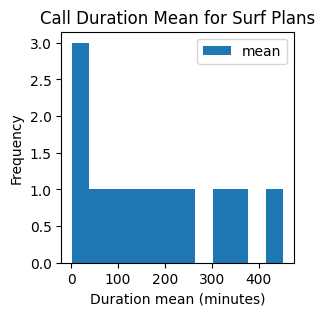

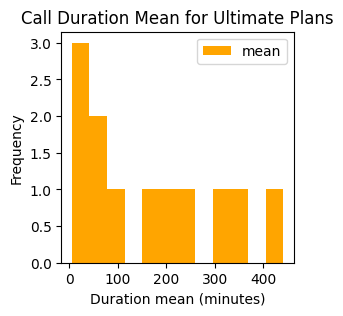

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

df_surf_calls_mean.plot (
                bins = 12,   #Estamos revisando que tan frecuente qes que el promedio...
    #...de los minutos usados al mes por los usuarios este en un determinado rango,
    #Se eligio un valor de bins no tan elevado ya que sí se separa hasta que ...
    #salgan 12 valores discretos, aparecerían puras barras de...
    #valor 1 que no nos permite observar el comportamiento.
                title = 'Call Duration Mean for Surf Plans',
                kind ='hist',
                xlabel = 'Duration mean (minutes)',
                figsize =(3,3),

)
plt.show()

df_ultimate_calls_mean.plot (
                bins = 12,
                title = 'Call Duration Mean for Ultimate Plans',
                kind ='hist',
                xlabel = 'Duration mean (minutes)',
                figsize =(3,3),
                color = 'orange'

)
plt.show()

#Se generaron dos gráficos por que en uno solo se superponian valores...
#...y no se podía visualizar realmente el comportaminto de cada uno de los grupos



En los histogramas podemos observar las frecuencia de ocurrencia de cada intervalo de valores de duracion en los doce meses del año.

A continuación se calcula la media y la varianza de cada una de los grupos (plan surf y plan ultimate). Estas dos medidas de estadística descriptiva permitiran averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_min_surf = df_concat_calls.mean()
variance_min_surf = np.var(df_surf_calls_mean)

mean_min_ultimate = df_ultimate_calls_mean.mean()
variance_min_ultimate= np.var(df_ultimate_calls_mean)

print(f'La media de duración de llamadas del plan surf es:{mean_min_surf}')
print(f'La varianza de duración de llamadas del plan surf es:{variance_min_surf}')

print(f'La media de duración de llamadas del plan ultimate es:{mean_min_ultimate}')
print(f'La varianza de duración de llamadas del plan ultimate es:{variance_min_ultimate}')

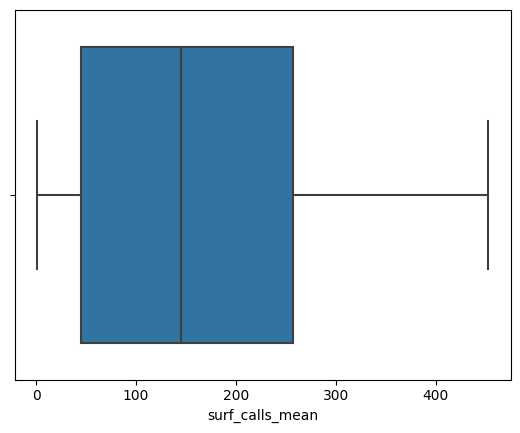

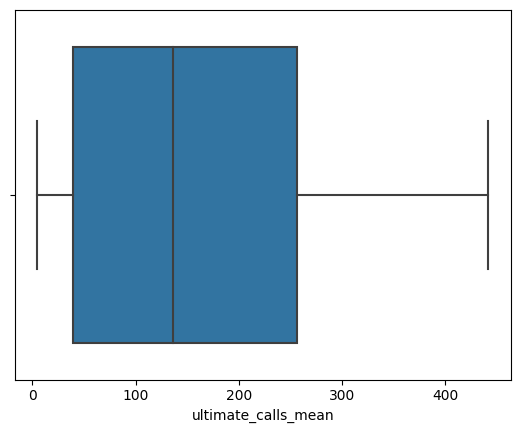

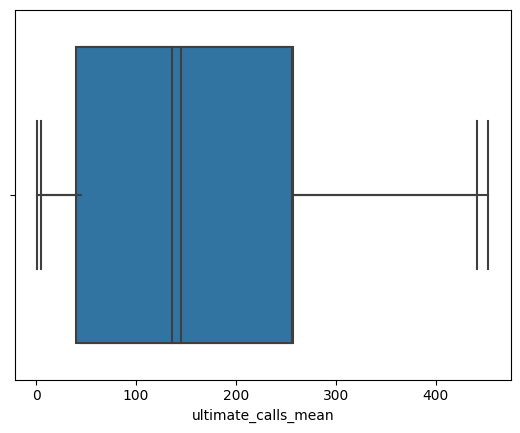

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas


sns.boxplot(df_concat_calls['surf_calls_mean'])
plt.show()
sns.boxplot(df_concat_calls['ultimate_calls_mean'])
plt.show()

sns.boxplot(df_concat_calls['surf_calls_mean'])
sns.boxplot(df_concat_calls['ultimate_calls_mean'])
plt.show()


Conclusiones con respecto al comportamiento de los usuarios con respecto a las llamadas:
El comportamiento de los usurios varia MUY POCO en función del plan.
Los del plan surf tiene una media de tan solo 4 minutos más que la del plan ultimate. Esta diferecia se puede ir observando en cada uno de los graficos:
* En el de barras observamos como en la mayoría de los meses el plan surf tiene una barra un poco más alta que el plan ultimate. Tambien podemos notar que siguen el mismo comportamiento durante el año; cada mes van aumentando la duración de las llamadas exponencialmente (siendo el mes de un promedio de duración mayor, diciembre).
* En los histogramas se observa la frecuencia en que la duración de llamadas se repiten en los meses. Practicamente cada mes tiene un valor difrente. Es por ello que aparecen cajas que parecen rectagulos (la mayoria de los valores ocurren solo una vez). Donde tenemos mayores frecuencias son los numeros entre 0-100, estas son las duraciones más comunes. La diferencia que vemos entre surf y ultimate , es que en ultimate la franga entre (aproximadamente) los 30-60 minutos de duración aumenta al doble sin embargo perdemos la un franga entre (aproximadamente) 110 -140 min; esto indica una diferencia de duración de las llamadas, siendo en ultimate menor duración. NOTA: Se eligio un valor de bins no tan elevado ya que sí se separa hasta que salgan los 12 valores discretos, aparecerían puras barras de valor 1 que no nos permite observar el comportamiento.
* Con la grafica de caja-bigotes comprobamos que ambos conjuntos de datos tienen practicamente el mismo comportamiento, los cuartiles (los rangos donde se distribuyen la mayor cantidad de los datos) y los bigotes (valores min y maximo), son muy parecidos. Solo se recorre conforme aumenta la media en surf.
* Con el valor  de la varianza, comprobamos que el comportamiento de disperción es muy similiar entre los grupos. Y con la media vemos la pequeña diferencia de duración, siendo mayor para el grupo de los usuarios con plan surf.

### Mensajes

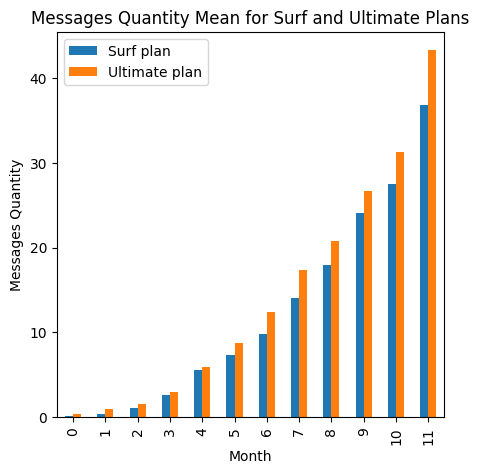

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#Obtenemos las tablas de numero de mensajes
df_surf_sms = df_surf.loc[:,['sms_m1','sms_m2','sms_m3','sms_m4','sms_m5','sms_m6','sms_m7',
                      'sms_m8','sms_m9','sms_m10','sms_m11', 'sms_m12']]
df_ultimate_sms = df_ultimate.loc[:,['sms_m1','sms_m2','sms_m3','sms_m4','sms_m5','sms_m6','sms_m7',
                      'sms_m8','sms_m9','sms_m10','sms_m11', 'sms_m12']]
#df_surf_sms.info() # 333 entradas, unicamente columnas de duracion de llamadas por mes
#df_ultimate_sms.info() # 157 entradas, unicamente columnas de duracion de llamadas por mes


#Obtenemos promedios
colums = ['sms_m1','sms_m2','sms_m3','sms_m4','sms_m5','sms_m6','sms_m7',
                      'sms_m8','sms_m9','sms_m10','sms_m11', 'sms_m12']

surf_sms_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan surf por mes
for col in colums:
    mean = df_surf_sms[col].mean()
    surf_sms_mean[col] = mean
df_surf_sms_mean=pd.DataFrame(list(surf_sms_mean.items()), columns=["month", "mean"])
#df_surf_sms_mean.info() # 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_surf_sms_mean.head())

ultimate_sms_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan ultimate por mes
for col in colums:
    mean = df_ultimate_sms[col].mean()
    ultimate_sms_mean[col] = mean
df_ultimate_sms_mean=pd.DataFrame(list(ultimate_sms_mean.items()), columns=["month", "mean"])
#df_ultimate_sms_mean.info()  ## 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_ultimate_sms_mean.head())

#Graficamos en una sola grafica para comparar

df_concat_sms =pd.concat([df_surf_sms_mean,df_ultimate_sms_mean], axis = 'columns')
df_concat_sms.columns = ['surf_sms_month','surf_sms_mean','ultimate_sms_month','ultimate_sms_mean']

cols = ['surf_sms_mean','ultimate_sms_mean']

df_concat_sms.plot(y = cols,
                     title = 'Messages Quantity Mean for Surf and Ultimate Plans',
                     kind ='bar',
                     xlabel = 'Month',
                     ylabel = 'Messages Quantity',
                     figsize =(5,5)

)
plt.legend(['Surf plan ','Ultimate plan'])
plt.show()



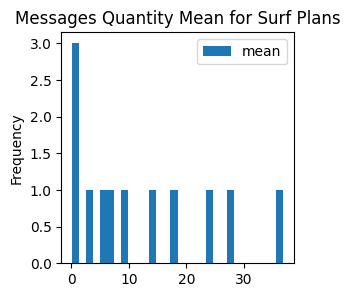

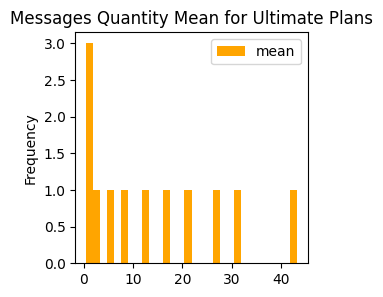

In [ ]:
# Compara la cantidad de mensajes enviados por usuarios por plan cada mes

df_surf_sms_mean.plot (
                bins = 30,
                title = 'Messages Quantity Mean for Surf Plans',
                kind ='hist',
                xlabel = 'Messages Quantity Mean',
                figsize =(3,3),

)
plt.show()

df_ultimate_sms_mean.plot (
                bins = 30,
                title = 'Messages Quantity Mean for Ultimate Plans',
                kind ='hist',
                xlabel = 'Messages Quantity Mean',
                figsize =(3,3),
                color = 'orange'

)
plt.show()


La media de la cantidad mensual de mensajes del plan surf es:surf_sms_mean        12.265766
ultimate_sms_mean    14.350849
dtype: float64
La varianza de la cantidad mensual de mensajes del plan surf es:mean    133.150718
dtype: float64
La media de la cantidad mensual de mensajes del plan ultimate es:mean    14.350849
dtype: float64
La varianza de la cantidad mensual de mensajes del plan ultimate es:mean    174.76879
dtype: float64


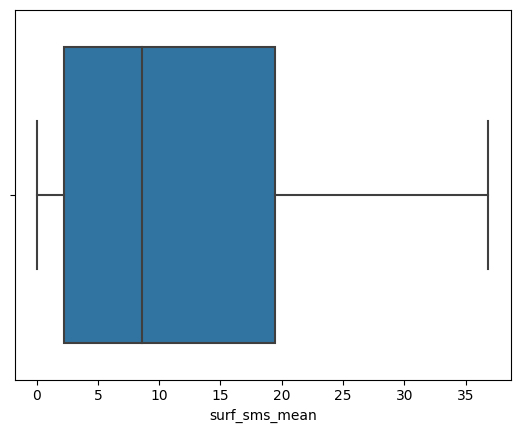

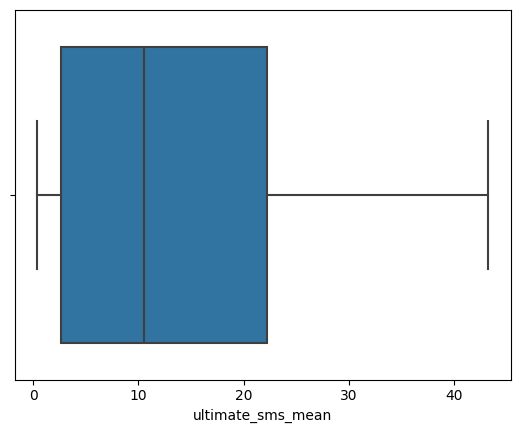

In [ ]:
# Calcula la media y la varianza de la cantidad mensual de mensajes.

mean_sms_surf = df_concat_sms.mean()
variance_sms_surf = np.var(df_surf_sms_mean)

mean_sms_ultimate = df_ultimate_sms_mean.mean()
variance_sms_ultimate= np.var(df_ultimate_sms_mean)

print(f'La media de la cantidad mensual de mensajes del plan surf es:{mean_sms_surf}')
print(f'La varianza de la cantidad mensual de mensajes del plan surf es:{variance_sms_surf}')

print(f'La media de la cantidad mensual de mensajes del plan ultimate es:{mean_sms_ultimate}')
print(f'La varianza de la cantidad mensual de mensajes del plan ultimate es:{variance_sms_ultimate}')

# Traza un diagrama de caja para visualizar la distribución de la cantidad promedio de mensajes.


sns.boxplot(df_concat_sms['surf_sms_mean'])
plt.show()
sns.boxplot(df_concat_sms['ultimate_sms_mean'])
plt.show()


Conclusiones con respecto al comportamiento de los usuarios con respecto a los mensajes:
El comportamiento de los usurios varia MUY POCO en función del plan.
Los promedios de cantidad de mensajes enviados por los usuarios es de tan solo 4 mensajes más para el plan ultimate que para surf.  Esta diferecia se puede ir observando en cada uno de los graficos:
* En el de barras observamos como todos los meses el plan ultimate tiene una barra un  más alta que el plan surf. Tambien podemos notar que siguen el mismo comportamiento durante el año; cada mes van aumentando exponencialmente el promedio de la cantidad de mensajes enviados.
* En los histogramas se observa la frecuencia en que el promedio de mensajes enviados se repiten a traves de los meses. Cada mes tiene un valor diferente; es por ello que aparecen valores discretos (barras separadas). Pero con el valor de bins ajustamos el grosor de los framentos para poder observar comportamiento, elegimos nos asignar un valor de bins no tan elevado ya que sí se separa hasta que salgan los 12 valores discretos, aparecerían puras barras de valor 1.
En estos graficos podemos observar que el plan ultimate envia más mensajes que surf, por ejemplo, si  contamos la cantidad de barritas que hay despues del valor 10 en cada gráfica; lo que indica que en este grupo hay más meses en los que el promedio de mensajes enviados fue mayor a 10. En otras palabras, si las barritas tienden irse a la derecha son más la cantidad de mensajes enviados por mes.
* Con el valor  de la varianza, comprobamos que el comportamiento de disperción es muy similiar entre los grupos.Sim embargo hay una podemos comprobar una pequeña diferencia en que la varianza es menor en plan surf , lo que indica que los valores del plan ultimate estan más dispersos.
* Lo anterior, también lo podemos observar con las graficas de caja-bigotes en el que el rango de valores de ultimate es mayor que surf; ambos comienzan en aproximadamente en 0 (valore mínimo), pero surf termina con su valor máximo en alrededor de 37 y ultimate en alrededor de 42.

Hasta el momento sabemos que los usuarios del plan surf prefieren realizar llamadas y los del plan ultimate enviar mensajes.


### Internet

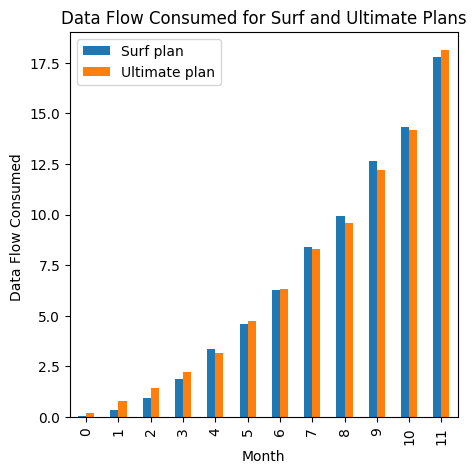

In [ ]:
# Comprara la cantidad de flujo de datos que consumen los usuarios de cada plan por mes

#Obtenemos las tablas de numero de mensajes
df_surf_gb = df_surf.loc[:,['gb_m1','gb_m2','gb_m3','gb_m4','gb_m5','gb_m6','gb_m7',
                      'gb_m8','gb_m9','gb_m10','gb_m11', 'gb_m12']]
df_ultimate_gb = df_ultimate.loc[:,['gb_m1','gb_m2','gb_m3','gb_m4','gb_m5','gb_m6','gb_m7',
                      'gb_m8','gb_m9','gb_m10','gb_m11', 'gb_m12']]
#df_surf_gb.info() # 333 entradas, unicamente columnas de duracion de llamadas por mes
#df_ultimate_gb.info() # 157 entradas, unicamente columnas de duracion de llamadas por mes


#Obtenemos promedios
colums = ['gb_m1','gb_m2','gb_m3','gb_m4','gb_m5','gb_m6','gb_m7',
                      'gb_m8','gb_m9','gb_m10','gb_m11', 'gb_m12']

surf_gb_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan surf por mes
for col in colums:
    mean = df_surf_gb[col].mean()
    surf_gb_mean[col] = mean
df_surf_gb_mean=pd.DataFrame(list(surf_gb_mean.items()), columns=["month", "mean"])
#df_surf_gb_mean.info() # 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_surf_gb_mean.head())

ultimate_gb_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan ultimate por mes
for col in colums:
    mean = df_ultimate_gb[col].mean()
    ultimate_gb_mean[col] = mean
df_ultimate_gb_mean=pd.DataFrame(list(ultimate_gb_mean.items()), columns=["month", "mean"])
#df_ultimate_gb_mean.info()  ## 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_ultimate_gb_mean.head())

#Graficamos en una sola grafica para comparar

df_concat_gb =pd.concat([df_surf_gb_mean,df_ultimate_gb_mean], axis = 'columns')
df_concat_gb.columns = ['surf_gb_month','surf_gb_mean','ultimate_gb_month','ultimate_gb_mean']

cols = ['surf_gb_mean','ultimate_gb_mean']

df_concat_gb.plot(y = cols,
                     title = 'Data Flow Consumed for Surf and Ultimate Plans',
                     kind ='bar',
                     xlabel = 'Month',
                     ylabel = 'Data Flow Consumed ',
                     figsize =(5,5)

)
plt.legend(['Surf plan ','Ultimate plan'])
plt.show()


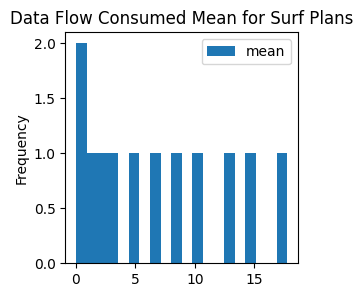

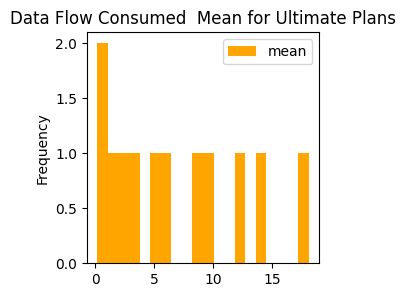

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

df_surf_gb_mean.plot (
                bins = 20,
                title = 'Data Flow Consumed Mean for Surf Plans',
                kind ='hist',
                xlabel = 'Data Flow Consumed Mean',
                figsize =(3,3),

)
plt.show()

df_ultimate_gb_mean.plot (
                bins = 20,
                title = 'Data Flow Consumed  Mean for Ultimate Plans',
                kind ='hist',
                xlabel = 'Data Flow Consumed  Mean',
                figsize =(3,3),
                color = 'orange'

)
plt.show()


La media de la cantidad mensual de GB consumidos del plan surf es:surf_gb_mean        6.706707
ultimate_gb_mean    6.771762
dtype: float64
La varianza de la cantidad mensual de GB consumidos  del plan surf es:mean    32.213332
dtype: float64
La media de la cantidad mensual de GB consumidos del plan ultimate es:mean    6.771762
dtype: float64
La varianza de la cantidad mensual de GB consumidos  del plan ultimate es:mean    30.817659
dtype: float64


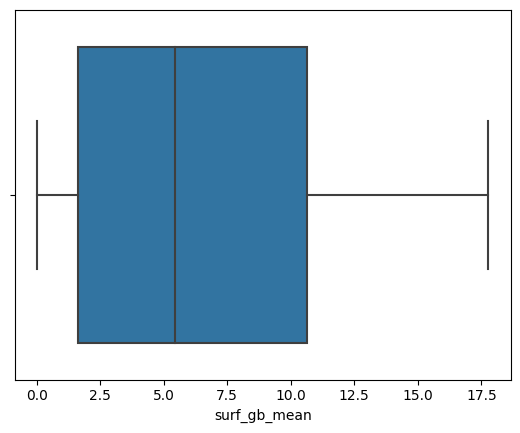

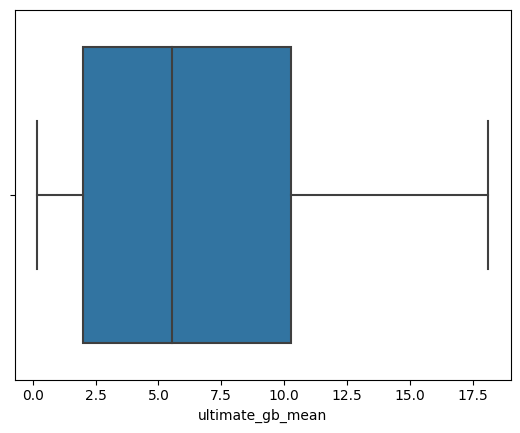

In [ ]:
# Calcula la media y la varianza de la promedio mensual del flujo de datos consumido por los usuarios de cada plan.

mean_gb_surf = df_concat_gb.mean()
variance_gb_surf = np.var(df_surf_gb_mean)

mean_gb_ultimate = df_ultimate_gb_mean.mean()
variance_gb_ultimate= np.var(df_ultimate_gb_mean)

print(f'La media de la cantidad mensual de GB consumidos del plan surf es:{mean_gb_surf}')
print(f'La varianza de la cantidad mensual de GB consumidos  del plan surf es:{variance_gb_surf}')

print(f'La media de la cantidad mensual de GB consumidos del plan ultimate es:{mean_gb_ultimate}')
print(f'La varianza de la cantidad mensual de GB consumidos  del plan ultimate es:{variance_gb_ultimate}')

# Traza un diagrama de caja para visualizar la distribución los gb promedio consumidos por mes  por los usuarios de cada mes

sns.boxplot(df_concat_gb['surf_gb_mean'])
plt.show()
sns.boxplot(df_concat_gb['ultimate_gb_mean'])
plt.show()


Conclusiones con respecto al comportamiento de los usuarios con respecto a uso de datos de internet:
El comportamiento de los usurios varia MUY POCO en función del plan.
A lo largo del año, algunos meses el grupo del plan sur consume en promedio más gb que el grupo de ultimate, y en otros meses sucede lo opuesto. Resultando que la media anual es solo 0.07 GB mayor para el grupo del plan ultimate.  Esta diferecia se puede ir observando en cada uno de los graficos:
* En el de barras observamos como de los meses enero-mayo y en diciembre ultimate ocupa más datos, y los meses intermedios fue surf el grupo que utilizo más datos. Tambien podemos notar que siguen el mismo comportamiento durante el año; cada mes van aumentando exponencialmente el promedio de la cantidad de flujo de información consumidos.
* En los histogramas se observa la frecuencia en que el promedio de mensajes enviados se repiten a traves de los meses. Cada mes tiene un valor diferente; es por ello que aparecen valores discretos (barras separadas). Pero con el valor de bins ajustamos el grosor de los framentos para poder observar comportamiento, elegimos nos asignar un valor de bins no tan elevado ya que sí se separa hasta que salgan los 12 valores discretos, aparecerían puras barras de valor 1.
En ambos gráficos podemos observar algo parecido, la diferencia aparece cuando nos centramos en el rango de 5- 10 GB, en el histograma para surf se distribuyen 4 barras uniformemente en ultimate hay dos barras a cada limite de este rango, tambien equilibrandose y se obtiene un promedio similar. Se puede asociar a algo como promediar  5,6,8,9 y el de 5,5,9,9, los cuales nos dan el mismo resultado.
* Con el valor  de la varianza y la media, comprobamos que el comportamiento de disperción es muy similiar entre los grupos y que su valor central es practicamente el mismo.
* Lo anterior, también lo podemos observar con las graficas de caja-bigotes en los que los valores criticos( valor minimo, cuartil 1, media, cuartil 3 y valor máximo) se encuentran todos practicamente en los mismo valores comparanda cada uno entre los dos grupos.

Hasta el momento sabemos que los usuarios del plan surf prefieren realizar llamadas, los del plan ultimate enviar mensajes, y ambos grupos utilizan por igual el internet.

### Ingreso

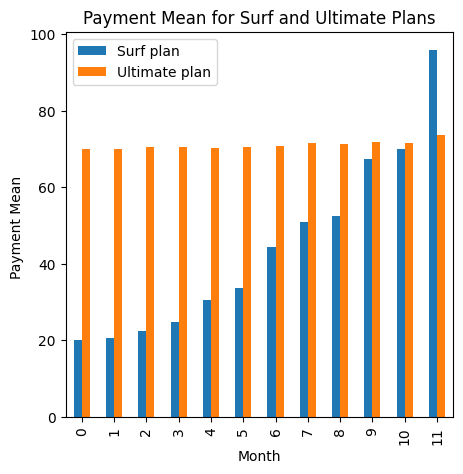

In [ ]:
# Comprara la los promedios de  ingresos por cada grupo de usuarios por mes

#Obtenemos las tablas de numero de mensajes
df_surf_payment = df_surf.loc[:,['payment_m1','payment_m2','payment_m3','payment_m4','payment_m5','payment_m6','payment_m7',
                      'payment_m8','payment_m9','payment_m10','payment_m11', 'payment_m12']]
df_ultimate_payment = df_ultimate.loc[:,['payment_m1','payment_m2','payment_m3','payment_m4','payment_m5','payment_m6','payment_m7',
                      'payment_m8','payment_m9','payment_m10','payment_m11', 'payment_m12']]
#df_surf_gb.info() # 333 entradas, unicamente columnas de duracion de llamadas por mes
#df_ultimate_gb.info() # 157 entradas, unicamente columnas de duracion de llamadas por mes


#Obtenemos promedios
colums = ['payment_m1','payment_m2','payment_m3','payment_m4','payment_m5','payment_m6','payment_m7',
                      'payment_m8','payment_m9','payment_m10','payment_m11', 'payment_m12']

surf_payment_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan surf por mes
for col in colums:
    mean = df_surf_payment[col].mean()
    surf_payment_mean[col] = mean
df_surf_payment_mean=pd.DataFrame(list(surf_payment_mean.items()), columns=["month", "mean"])
#df_surf_payment_mean.info() # 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_surf_payment_mean.head())

ultimate_payment_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan ultimate por mes
for col in colums:
    mean = df_ultimate_payment[col].mean()
    ultimate_payment_mean[col] = mean
df_ultimate_payment_mean=pd.DataFrame(list(ultimate_payment_mean.items()), columns=["month", "mean"])
#df_ultimate_payment_mean.info()  ## 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_ultimate_payment_mean.head())

#Graficamos en una sola grafica para comparar

df_concat_payment =pd.concat([df_surf_payment_mean,df_ultimate_payment_mean], axis = 'columns')
df_concat_payment.columns = ['surf_payment_month','surf_payment_mean','ultimate_payment_month','ultimate_payment_mean']

cols = ['surf_payment_mean','ultimate_payment_mean']

df_concat_payment.plot(y = cols,
                     title = 'Payment Mean for Surf and Ultimate Plans',
                     kind ='bar',
                     xlabel = 'Month',
                     ylabel = 'Payment Mean ',
                     figsize =(5,5)

)
plt.legend(['Surf plan ','Ultimate plan'])
plt.show()

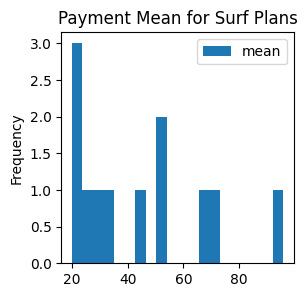

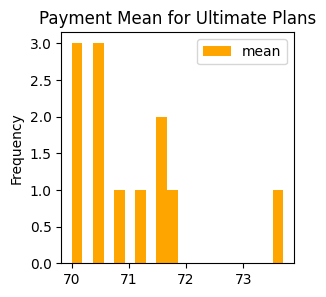

In [ ]:
# Compara los ingresos promedios por los usuarios de cada plan al mes

df_surf_payment_mean.plot (
                bins = 20,
                title = 'Payment Mean for Surf Plans',
                kind ='hist',
                xlabel = 'Payment Mean',
                figsize =(3,3),

)
plt.show()

df_ultimate_payment_mean.plot (
                bins = 20,
                title = 'Payment Mean for Ultimate Plans',
                kind ='hist',
                xlabel = 'Payment Mean',
                figsize =(3,3),
                color = 'orange'

)
plt.show()


La media del pago hecho por los usuarios del plan surf es:surf_payment_mean        44.444895
ultimate_payment_mean    71.032909
dtype: float64
La varianza del pago hecho por los usuarios del plan surf es:mean    521.212803
dtype: float64
La media del pago hecho por los usuarios del plan ultimate es:mean    71.032909
dtype: float64
La varianza del pago hecho por los usuarios del plan ultimate es:mean    1.013116
dtype: float64


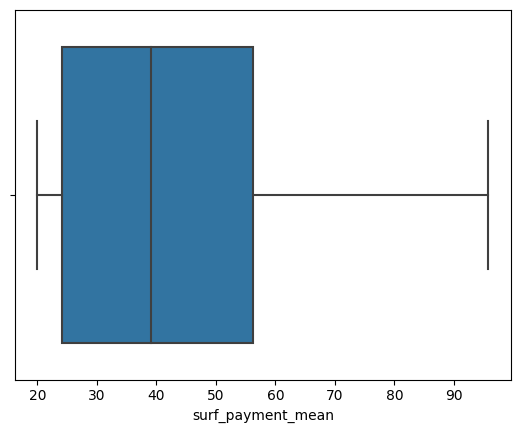

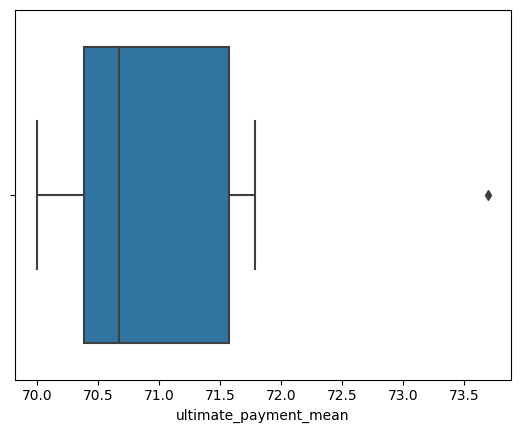

In [ ]:
# Calcula la media y la varianza de la promedio mensual de los ingresos por pago de los usuarios de cada plan.

mean_payment_surf = df_concat_payment.mean()
variance_payment_surf = np.var(df_surf_payment_mean)

mean_payment_ultimate = df_ultimate_payment_mean.mean()
variance_payment_ultimate= np.var(df_ultimate_payment_mean)

print(f'La media del pago hecho por los usuarios del plan surf es:{mean_payment_surf}')
print(f'La varianza del pago hecho por los usuarios del plan surf es:{variance_payment_surf}')

print(f'La media del pago hecho por los usuarios del plan ultimate es:{mean_payment_ultimate}')
print(f'La varianza del pago hecho por los usuarios del plan ultimate es:{variance_payment_ultimate}')

# Traza un diagrama de caja para visualizar la distribución los promedios de pago de los usuarios de cada mes por plan

sns.boxplot(df_concat_payment['surf_payment_mean'])
plt.show()
sns.boxplot(df_concat_payment['ultimate_payment_mean'])
plt.show()


Conclusiones con respecto al comportamiento de los ingresos que se obtuvieron mensualmente en promedio para los usuarios de cada uno de los planes de pago:
El promedio anual de pago por usuario en el grupo de ultimate es de 71 dólares y el de surf es de 44.44 doláres. Esto tiene sentido al tomar en cuenta que ambos grupos tienen un comportamiento parecido de consumo que va va aumentando a través de los meses, el usurio de promedio del grupo surf casi nunca revasa su minutos, mensajes y datos inluidos y paga constantemente el costo base de la tarifa (70 dólares), por otra parte para los usuarios del grupo surf para el quinto mes empiezan a revasar los servicios incluidos pagando más que su tarifa base (20 dólares)
Este comportamiento se puede ir observando en cada uno de los graficos:
* En el de barras observamos como ultimate se mantiene practicamente constante a lo largo del año en 70, y surf esta constante en 20 los primeros meses y despues de revsar el limite de servicios incluidos va aumentando exponencialmente de la misma manera que hemos observado que aumenta el consumo de servicios (duración de llamada, mensajes enviados y consumo de gb).
* En el histograma las el plan surf la mayor parte de las barras se encunetran en un rango de 20-60 dólares y en el ultimate en un rango de 70-72 dólares.
* Lo anterior lo podemos observar también en el gráfico de caja- bigotes donde tenemos:
  Para surf unos bigotes que van desde un valor de 20 a ~93, siendo los más comunes (Q1-Q3) entre ~25 a ~52.
  Para Ultimate los bigotes van desde 70 a ~71.9, siendo los más comunes (Q1-Q3) entre ~71.3 a ~71.6
* Con el valor de la varianza observamos la distribución de los datos, siendo la varianza para ultimate muy cercano a 1 (es una función lineal) y el de surf mayor a 500 tiene una distribución no lineal.
  
En pocas palabras podemos decir que a la empresa la conviene la venta de tarifas ultimate ya que el cobro medio anual es del 49% más que a los usuarios del plan surf.

## Prueba las hipótesis estadísticas

### Hipótesis: "Son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf."


* Hipóteisis nula: "La media de los ingresos procedentes de los usuarios del plan  Ultimate es igual a la media de los ingresos del plan Surf"
* Hipóteisis alternetiva: "La media de los ingresos procedentes de los usuarios del plan  Ultimate NO es igual a la media de los ingresos del plan Surf"
* La prueba estadítica que se hará será aquella para "Hipótesis sobre la igualdad de las medias de dos poblaciones" y se hara con la prueba de dos colas ya que solo se considera que las medias a comparar son "diferentes", implica que puede ser mayor o menor.
* Valor de alfa, se refiere a la posibilidad de obtener el valor al menos tan extremo como los estas considerando. Se escoge de acuerdo a la necesidad de precisión, siendo comunmente utilizados 10%,5% y 0.1%. Usaremos el 5% de valor alfa.


In [ ]:
# Prueba las hipótesis

alpha = 0.05
results = st.ttest_ind(df_concat_payment['surf_payment_mean'], df_concat_payment['ultimate_payment_mean'], equal_var = False)
#equal_var = False, ya que no se puede aegurar que las varianzas sean iguales entre los planes.


#Dos condiciones para rechazar hipótesis nula de 2 colas:
 #La diferencia entre los valores es estadísticamente significativa

if (results.pvalue < alpha): #es una prueba de dos colas (valor de p no se divide entre dos.)
    print("Rechazamos hipótesis nula")
else:
    print("No hay motivos suficientes para rechazar hipótesis nula")


Rechazamos hipótesis nula


### Hipótesis: "El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones."

* Hipóteisis nula: "El ingreso promedio de los usuarios del área de NY-NJ es igual al promedio de los ingresos de los usuarios de otra regiones"
* Hipóteisis alternetiva: "El ingreso promedio de los usuarios del área de NY-NJ es diferente al promedio de los ingresos de los usuarios de otra regiones
* La prueba estadítica que se hará será aquella para "Hipótesis sobre la igualdad de las medias de dos poblaciones" y se hara con la prueba de dos colas ya que solo se considera que las medias a comparar son "diferentes", implica que puede ser mayor o menor.
* Valor de alfa, se refiere a la posibilidad de obtener el valor al menos tan extremo como los estas considerando. Se escoge de acuerdo a la necesidad de precisión, siendo comunmente utilizados 10%,5% y 0.1%. Usaremos el 5% de valor alfa.

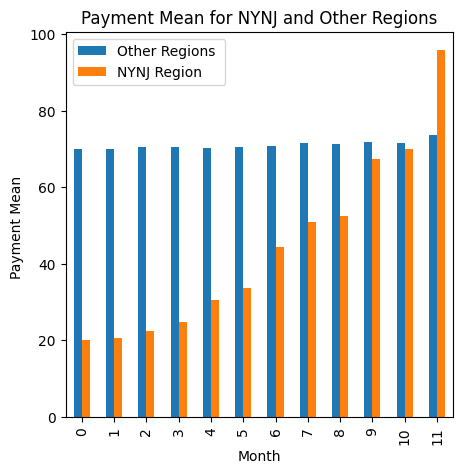

Rechazamos hipótesis nula


In [ ]:
# Prueba las hipótesis

## PREPARACION DE DATOS ##

# Primero separamos los datos por regiones
df_NYNJ = merged_DF[merged_DF['NY-NJ']==True]
df_regions = merged_DF[merged_DF['NY-NJ']== False]
#df_NYNJ.info()   # 79 entradas
#df_regions.info()  # 411 entradas    << total las 490 entradas de merged_DF (no todos los 500 usurios usaron los servicios en el 2018)

#Obtenemos las tablas de ingresos por mes
df_NYNJ_payments = df_surf.loc[:,['payment_m1','payment_m2','payment_m3','payment_m4','payment_m5','payment_m6','payment_m7',
                      'payment_m8','payment_m9','payment_m10','payment_m11', 'payment_m12']]
df_regions_payments = df_ultimate.loc[:,['payment_m1','payment_m2','payment_m3','payment_m4','payment_m5','payment_m6','payment_m7',
                      'payment_m8','payment_m9','payment_m10','payment_m11', 'payment_m12']]
#df_NYNJ_payments.info() # 79 entradas, unicamente columnas de ingresos por mes
#df_regions_payments.info() # 411 entradas, unicamente columnas de ingresos por mes


#Obtenemos promedios
colums = ['payment_m1','payment_m2','payment_m3','payment_m4','payment_m5','payment_m6','payment_m7',
                      'payment_m8','payment_m9','payment_m10','payment_m11', 'payment_m12']

NYNJ_payments_mean = {}  # Generamos dict>df para graficar promedios de ingresos para plan surf por mes
for col in colums:
    mean = df_NYNJ_payments[col].mean()
    NYNJ_payments_mean[col] = mean
df_NYNJ_payments_mean=pd.DataFrame(list(NYNJ_payments_mean.items()), columns=["month", "mean"])
#df_NYNJ_payments_mean.info() # 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_NYNJ_payments_mean.head())



regions_payments_mean = {}  # Generamos dict>df para graficar promedios de duracion de llamada plan ultimate por mes
for col in colums:
    mean = df_regions_payments[col].mean()
    regions_payments_mean[col] = mean
df_regions_payments_mean=pd.DataFrame(list(regions_payments_mean.items()), columns=["month", "mean"])
#df_regions_payments_mean.info()  ## 2 columnas (mes y promedio) * 12 filas (meses)
#print(df_regions_payments_mean.head())


## GRAFICA ##

#Graficamos en una sola grafica para comparar

df_concat_payment_regions =pd.concat([df_regions_payments_mean,df_NYNJ_payments_mean], axis = 'columns')
df_concat_payment_regions.columns = ['regions_payment_month','regions_payment_mean','NYNJ_payment_month','NYNJ_payment_mean']

cols = ['regions_payment_mean','NYNJ_payment_mean']

df_concat_payment_regions.plot(y = cols,
                     title = 'Payment Mean for NYNJ and Other Regions',
                     kind ='bar',
                     xlabel = 'Month',
                     ylabel = 'Payment Mean ',
                     figsize =(5,5)

)
plt.legend(['Other Regions ','NYNJ Region'])
plt.show()

## COMPROBAMOS HIPÓTESIS ##

alpha = 0.05
results = st.ttest_ind(df_regions_payments_mean['mean'], df_NYNJ_payments_mean['mean'], equal_var = False)
#equal_var = False, no se puede asegurar que las varianzas son iguales entre las regiones.

#Dos condiciones para rechazar hipótesis nula de 2 colas:
 #La diferencia entre los valores es estadísticamente significativa

if (results.pvalue < alpha): #es una prueba de dos colas (valor de p no se divide entre dos.)
    print("Rechazamos hipótesis nula")
else:
    print("No hay motivos suficientes para rechazar hipótesis nula")

## Conclusión general

En conclusión, hemos realizado todo el procesamiento de los datos para poder comprobar o rechazar las hipótesis. Para ellos se llevaron a cabo una serie de decisiones, enseguida se enumeran las claves:
* Crear una nueva tabla con los datos necesarios para la obtención de los valores de los ingresos por mes por usuario: cantidad de minutos por mes, cantidad mensajes por mes, cantidad de gb utilizados.
* Se calculan los ingresos por mes y se guardan en esta misma tabla.
* Esta tabla se divide en base a dos parametros uno para cada hipótesis:
 1. De acuerdo a la tarifa ( Surf y Ultimate)
 2. De acuerdo a la region ( Nueva York - Nueva Jersey  y las demás)
* Se prueban ambas hipotesis para el tipo de hipotesis sobre igualdad de las medios de dos poblaciones, como hpótesis de dos colas.

Como resultado obtuvimos que ambas hipótesis nulas, las cuales proponen la igualdad de las medias, se rechazaron; lo que indica que ambas hipotesis alternativas son ciertas. Se toma como verdadero que:
* "Son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf."
* "El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones."

